In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as px

In [28]:
Features_data = pd.read_csv(r"/Final Project/Features_data_set (1).csv")
store_data = pd.read_csv(r"/Final Project/stores_data_set (1).csv")
sales_data = pd.read_csv(r"/Final Project/sales_data_set.csv")

In [29]:
##Merging the datas to one file to another file using 'merge()'

In [30]:
df1 = sales_data.merge(Features_data,on=['Store','Date','IsHoliday'],how = 'inner')
df1.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,05-02-2010,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,1,12-02-2010,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106
2,1,1,19-02-2010,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106
3,1,1,26-02-2010,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106
4,1,1,05-03-2010,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106


In [31]:
df = df1.merge(store_data,on=['Store'],how = 'inner')
# df.iloc[6550:6600]
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,05-02-2010,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,1,12-02-2010,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,A,151315
2,1,1,19-02-2010,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315
3,1,1,26-02-2010,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,A,151315
4,1,1,05-03-2010,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,A,151315


In [32]:
df.isnull().sum()

Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday            0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
Type                 0
Size                 0
dtype: int64

In [33]:
df.fillna(0)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,05-02-2010,24924.50,False,42.31,2.572,0.00,0.00,0.00,0.00,0.00,211.096358,8.106,A,151315
1,1,1,12-02-2010,46039.49,True,38.51,2.548,0.00,0.00,0.00,0.00,0.00,211.242170,8.106,A,151315
2,1,1,19-02-2010,41595.55,False,39.93,2.514,0.00,0.00,0.00,0.00,0.00,211.289143,8.106,A,151315
3,1,1,26-02-2010,19403.54,False,46.63,2.561,0.00,0.00,0.00,0.00,0.00,211.319643,8.106,A,151315
4,1,1,05-03-2010,21827.90,False,46.50,2.625,0.00,0.00,0.00,0.00,0.00,211.350143,8.106,A,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,28-09-2012,508.37,False,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684,B,118221
421566,45,98,05-10-2012,628.10,False,64.89,3.985,5046.74,0.00,18.82,2253.43,2340.01,192.170412,8.667,B,118221
421567,45,98,12-10-2012,1061.02,False,54.47,4.000,1956.28,0.00,7.89,599.32,3990.54,192.327265,8.667,B,118221
421568,45,98,19-10-2012,760.01,False,56.47,3.969,2004.02,0.00,3.18,437.73,1537.49,192.330854,8.667,B,118221


In [34]:
##Using date column extracting the some features

In [35]:
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day
df['year_of_week'] = df['Date'].dt.isocalendar().week

In [36]:
df.tail()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,year,month,day,year_of_week
421565,45,98,2012-09-28,508.37,False,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684,B,118221,2012,9,28,39
421566,45,98,2012-10-05,628.10,False,64.89,3.985,5046.74,NaN,18.82,2253.43,2340.01,192.170412,8.667,B,118221,2012,10,5,40
421567,45,98,2012-10-12,1061.02,False,54.47,4.000,1956.28,NaN,7.89,599.32,3990.54,192.327265,8.667,B,118221,2012,10,12,41
421568,45,98,2012-10-19,760.01,False,56.47,3.969,2004.02,NaN,3.18,437.73,1537.49,192.330854,8.667,B,118221,2012,10,19,42
421569,45,98,2012-10-26,1076.80,False,58.85,3.882,4018.91,58.08,100.00,211.94,858.33,192.308899,8.667,B,118221,2012,10,26,43


In [37]:
##Adding all markdown column into  single column

In [38]:
df.loc[(df['MarkDown1'].isnull()==True),'MarkDown1'] = 0
df.loc[(df['MarkDown2'].isnull()==True),'MarkDown2'] = 0
df.loc[(df['MarkDown3'].isnull()==True),'MarkDown3'] = 0
df.loc[(df['MarkDown4'].isnull()==True),'MarkDown4'] = 0
df.loc[(df['MarkDown5'].isnull()==True),'MarkDown5'] = 0

df['Markdown'] = df['MarkDown1']+df['MarkDown2']+df['MarkDown3']+df['MarkDown4']+df['MarkDown5']


In [39]:
df['Markdown'] = df['Markdown'].replace(0, np.nan)

In [40]:
data = df.copy()
data.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,...,MarkDown5,CPI,Unemployment,Type,Size,year,month,day,year_of_week,Markdown
0,1,1,2010-02-05,24924.50,False,42.31,2.572,0.0,0.0,0.0,...,0.0,211.096358,8.106,A,151315,2010,2,5,5,NaN
1,1,1,2010-02-12,46039.49,True,38.51,2.548,0.0,0.0,0.0,...,0.0,211.242170,8.106,A,151315,2010,2,12,6,NaN
2,1,1,2010-02-19,41595.55,False,39.93,2.514,0.0,0.0,0.0,...,0.0,211.289143,8.106,A,151315,2010,2,19,7,NaN
3,1,1,2010-02-26,19403.54,False,46.63,2.561,0.0,0.0,0.0,...,0.0,211.319643,8.106,A,151315,2010,2,26,8,NaN
4,1,1,2010-03-05,21827.90,False,46.50,2.625,0.0,0.0,0.0,...,0.0,211.350143,8.106,A,151315,2010,3,5,9,NaN


In [41]:
data.drop(['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5'], axis = 1,inplace=True)
data

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size,year,month,day,year_of_week,Markdown
0,1,1,2010-02-05,24924.50,False,42.31,2.572,211.096358,8.106,A,151315,2010,2,5,5,NaN
1,1,1,2010-02-12,46039.49,True,38.51,2.548,211.242170,8.106,A,151315,2010,2,12,6,NaN
2,1,1,2010-02-19,41595.55,False,39.93,2.514,211.289143,8.106,A,151315,2010,2,19,7,NaN
3,1,1,2010-02-26,19403.54,False,46.63,2.561,211.319643,8.106,A,151315,2010,2,26,8,NaN
4,1,1,2010-03-05,21827.90,False,46.50,2.625,211.350143,8.106,A,151315,2010,3,5,9,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False,64.88,3.997,192.013558,8.684,B,118221,2012,9,28,39,9468.01
421566,45,98,2012-10-05,628.10,False,64.89,3.985,192.170412,8.667,B,118221,2012,10,5,40,9659.00
421567,45,98,2012-10-12,1061.02,False,54.47,4.000,192.327265,8.667,B,118221,2012,10,12,41,6554.03
421568,45,98,2012-10-19,760.01,False,56.47,3.969,192.330854,8.667,B,118221,2012,10,19,42,3982.42


In [42]:
##Checking correlation between the columns

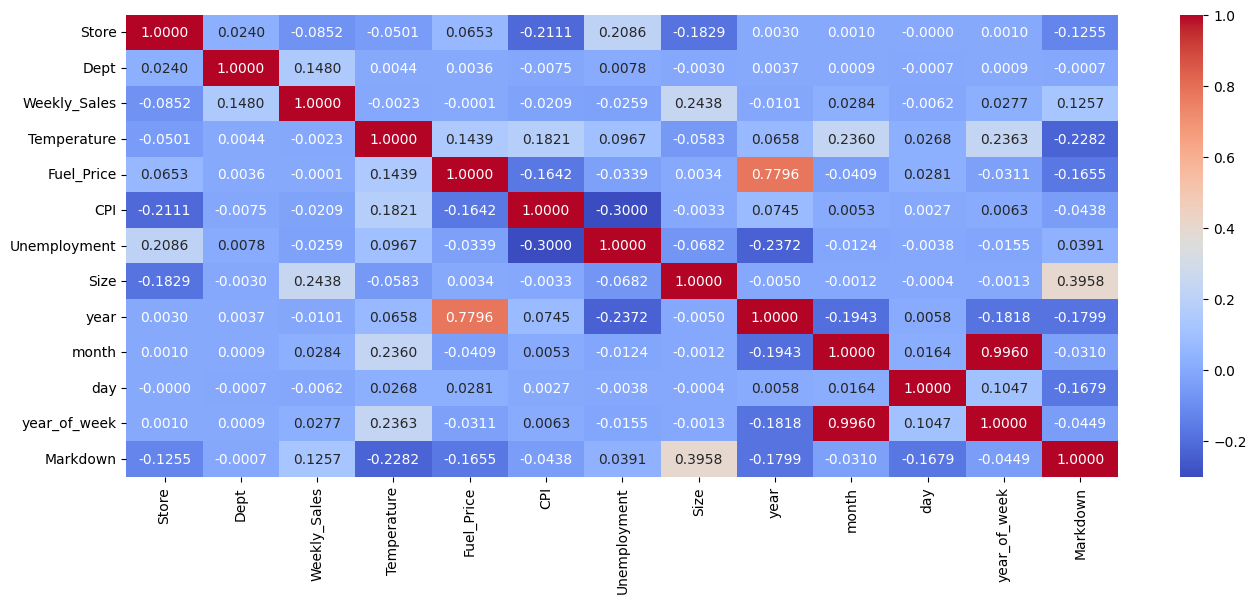

In [43]:
# Assuming your DataFrame is named 'data'
numeric_data = data.select_dtypes(include=np.number)

if not numeric_data.empty: #check if any numerical data exists.
    plt.figure(figsize=(16, 6))
    sns.heatmap(numeric_data.corr(), annot=True, cmap="coolwarm", fmt=".4f")
    plt.show()
else:
    print("No numerical data found in dataframe.")

In [44]:
len(data['Fuel_Price'].unique())

892

In [45]:
import scipy.stats as st

In [46]:
st.f_oneway(data['Fuel_Price'],data['year'])

F_onewayResult(statistic=np.float64(2010220620900.942), pvalue=np.float64(0.0))

In [47]:
##Checking the outlier using boxplot chart

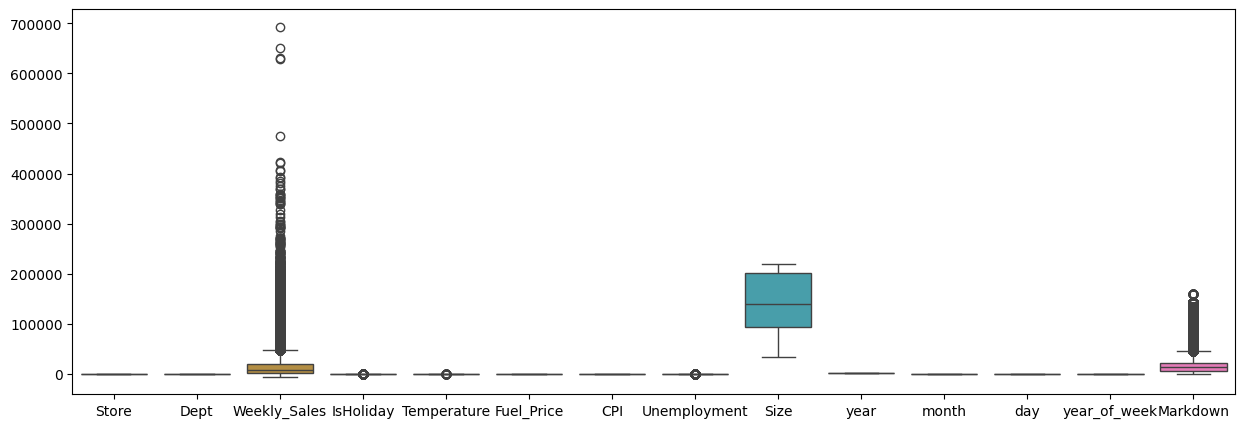

In [48]:
plt.figure(figsize=(15,5))
sns.boxplot(data=data)
plt.show()

In [49]:
##Checking data distribution

Store


C:\Users\Anupama\AppData\Local\Temp\ipykernel_18212\1900344749.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[i],color="g")


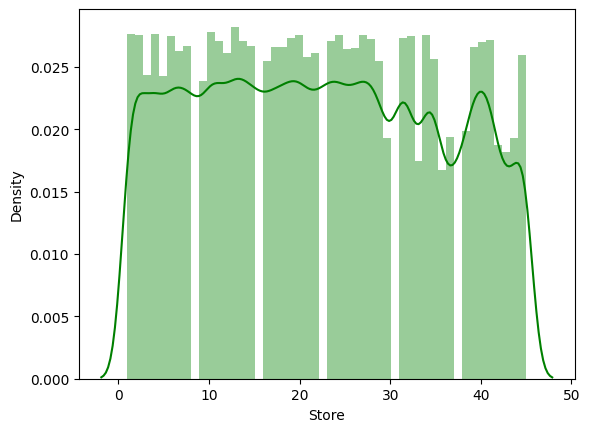

Dept


C:\Users\Anupama\AppData\Local\Temp\ipykernel_18212\1900344749.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[i],color="g")


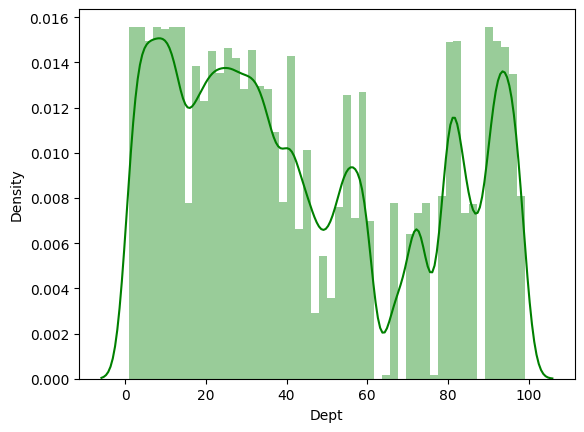

Date


C:\Users\Anupama\AppData\Local\Temp\ipykernel_18212\1900344749.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[i],color="g")


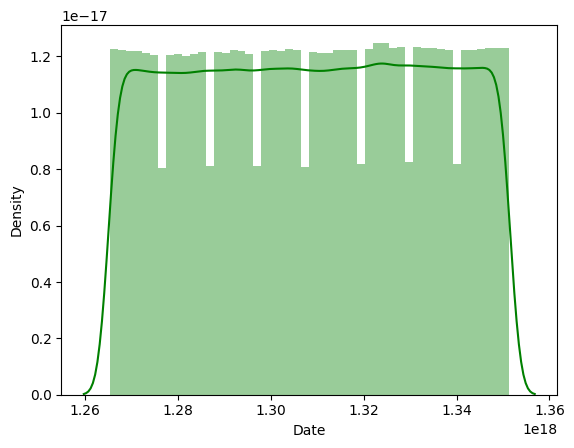

Weekly_Sales


C:\Users\Anupama\AppData\Local\Temp\ipykernel_18212\1900344749.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[i],color="g")


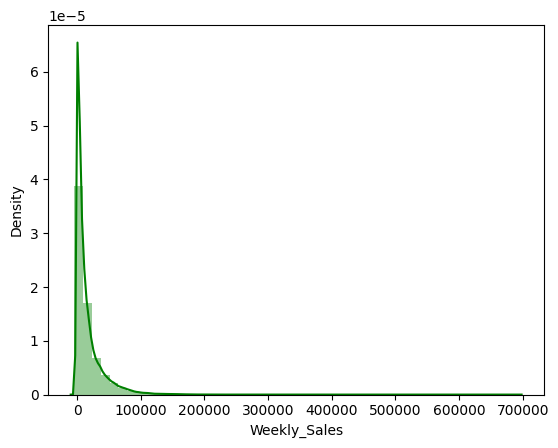

IsHoliday


C:\Users\Anupama\AppData\Local\Temp\ipykernel_18212\1900344749.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[i],color="g")


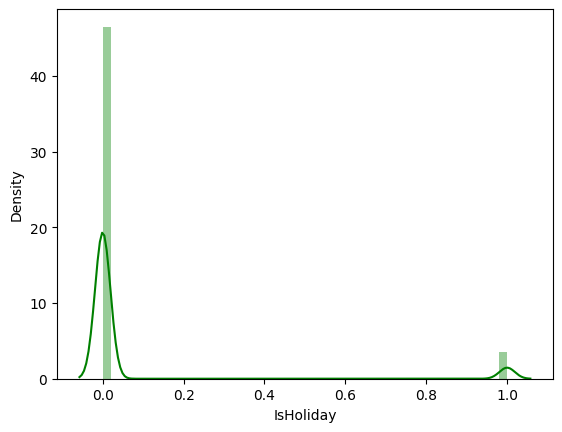

Temperature


C:\Users\Anupama\AppData\Local\Temp\ipykernel_18212\1900344749.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[i],color="g")


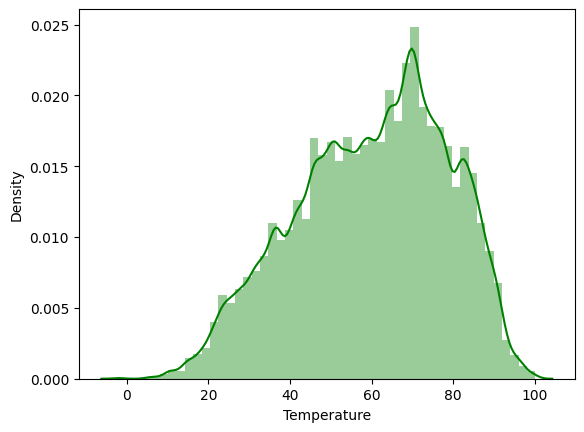

Fuel_Price


C:\Users\Anupama\AppData\Local\Temp\ipykernel_18212\1900344749.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[i],color="g")


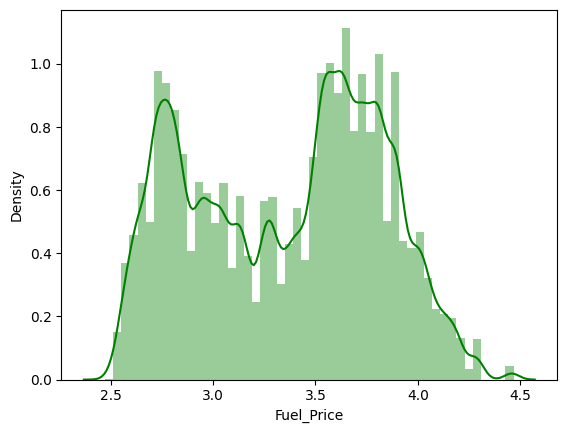

CPI


C:\Users\Anupama\AppData\Local\Temp\ipykernel_18212\1900344749.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[i],color="g")


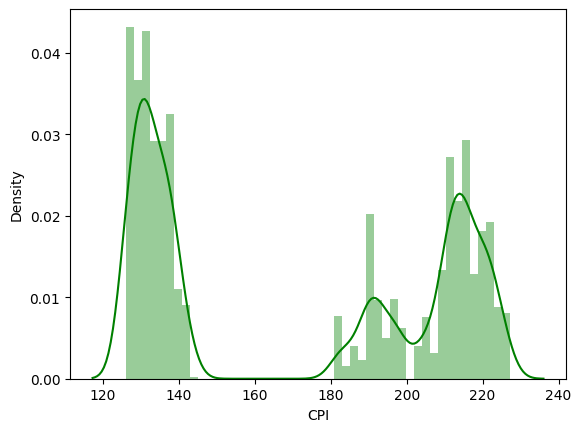

Unemployment


C:\Users\Anupama\AppData\Local\Temp\ipykernel_18212\1900344749.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[i],color="g")


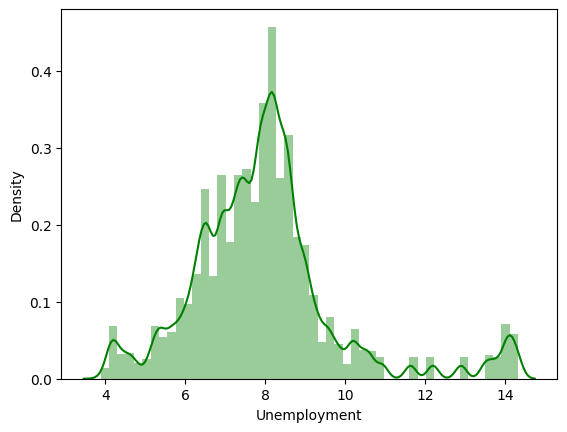

Size


C:\Users\Anupama\AppData\Local\Temp\ipykernel_18212\1900344749.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[i],color="g")


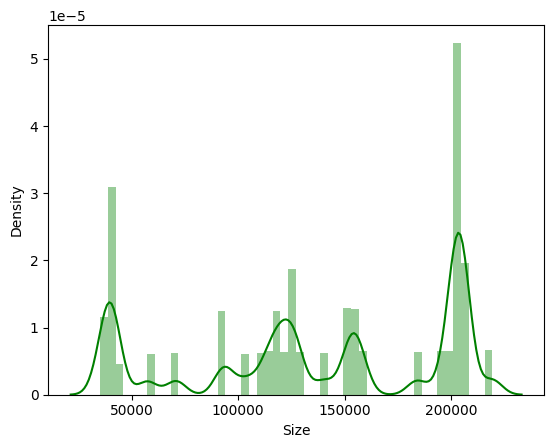

year


C:\Users\Anupama\AppData\Local\Temp\ipykernel_18212\1900344749.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[i],color="g")


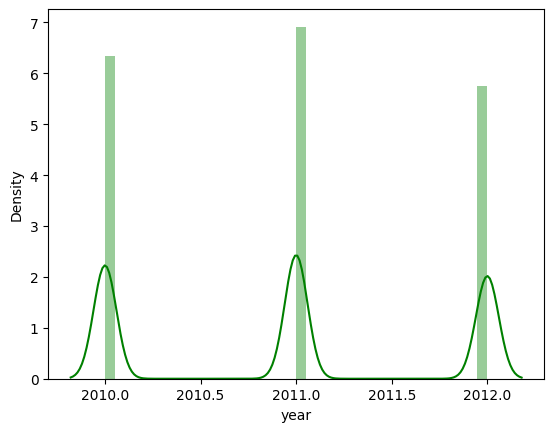

month


C:\Users\Anupama\AppData\Local\Temp\ipykernel_18212\1900344749.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[i],color="g")


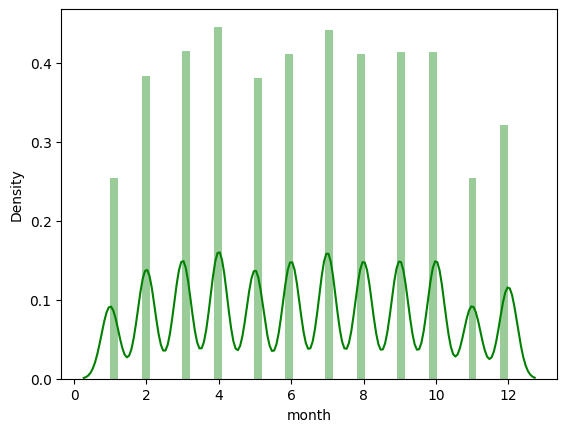

day


C:\Users\Anupama\AppData\Local\Temp\ipykernel_18212\1900344749.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[i],color="g")


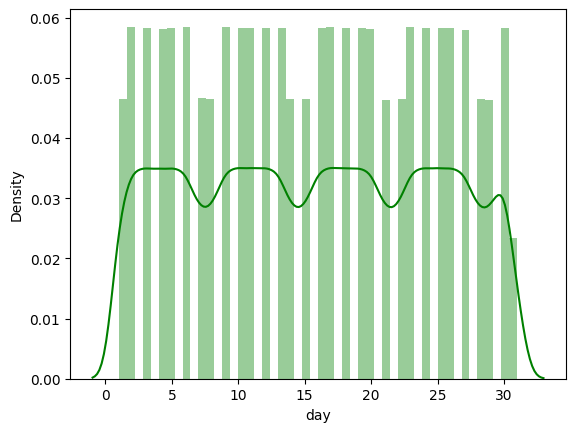

year_of_week


C:\Users\Anupama\AppData\Local\Temp\ipykernel_18212\1900344749.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[i],color="g")


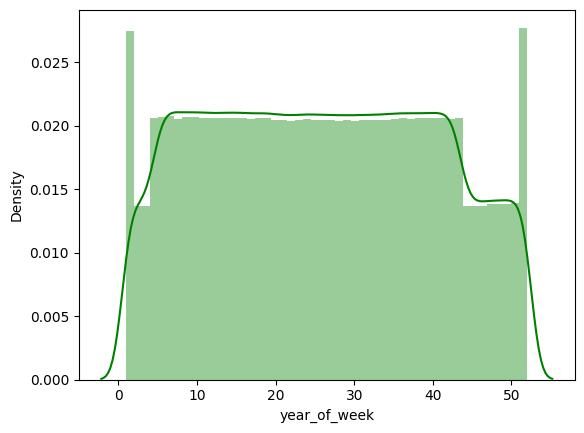

Markdown


C:\Users\Anupama\AppData\Local\Temp\ipykernel_18212\1900344749.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[i],color="g")


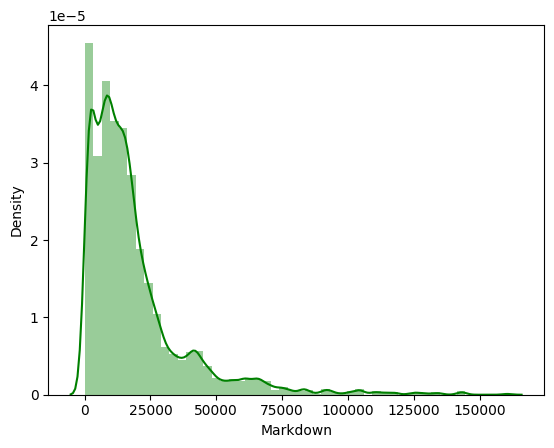

In [50]:
for i in data.columns:
  if data[i].dtype != 'object':
    print(i)
    sns.distplot(data[i],color="g")
    plt.show()

In [51]:
n = data[(data['Weekly_Sales']==0)]
n

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size,year,month,day,year_of_week,Markdown
6055,1,47,2011-03-11,0.0,False,53.56,3.459,214.111056,7.742,A,151315,2011,3,11,10,NaN
6059,1,47,2011-08-12,0.0,False,90.76,3.638,215.605788,7.962,A,151315,2011,8,12,32,NaN
6060,1,47,2011-08-19,0.0,False,89.94,3.554,215.669311,7.962,A,151315,2011,8,19,33,NaN
16309,2,47,2012-04-13,0.0,False,68.08,3.891,221.148403,6.891,A,202307,2012,4,13,15,21715.91
17457,2,60,2010-03-19,0.0,False,54.52,2.720,210.873332,8.324,A,202307,2010,3,19,11,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403340,43,85,2012-01-13,0.0,False,43.68,3.261,211.411571,9.653,C,41062,2012,1,13,2,2327.99
407652,44,27,2011-01-14,0.0,False,20.60,2.903,127.300935,7.224,C,39910,2011,1,14,2,NaN
417805,45,47,2011-02-11,0.0,True,30.30,3.239,183.701613,8.549,B,118221,2011,2,11,6,NaN
418079,45,54,2010-10-15,0.0,False,58.61,2.868,182.810620,8.724,B,118221,2010,10,15,41,NaN


In [52]:
n[n['IsHoliday']==True]

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size,year,month,day,year_of_week,Markdown
144299,15,51,2010-12-31,0.0,True,26.54,3.336,132.815032,8.067,B,123737,2010,12,31,52,NaN
165197,17,77,2011-09-09,0.0,True,61.94,3.619,129.368613,6.745,B,93188,2011,9,9,36,NaN
417805,45,47,2011-02-11,0.0,True,30.30,3.239,183.701613,8.549,B,118221,2011,2,11,6,NaN


In [53]:
c = 0
for i,j,k in zip(n['Store'],n['Dept'],n['Type']):
  mean = data[(data['Store']==i)&(data['Dept']==j)&(data['Type']==k)]['Weekly_Sales'].mean()
  data.loc[(data['Weekly_Sales']==0)&(data['Store']==i)&(data['Dept']==j)&(data['Type']==k)&(data['IsHoliday']==False),'Weekly_Sales'] = mean
  c+=1
data.loc[data['Weekly_Sales']==0,'Markdown'] = 0
print(c)

73


In [54]:
n = data[(data['Weekly_Sales']==0)]
n

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size,year,month,day,year_of_week,Markdown
144299,15,51,2010-12-31,0.0,True,26.54,3.336,132.815032,8.067,B,123737,2010,12,31,52,0.0
165197,17,77,2011-09-09,0.0,True,61.94,3.619,129.368613,6.745,B,93188,2011,9,9,36,0.0
417805,45,47,2011-02-11,0.0,True,30.30,3.239,183.701613,8.549,B,118221,2011,2,11,6,0.0


In [55]:
data1 = data.copy()

In [56]:
data1. to_csv('Cleaned_data.csv',index = False)
df1=pd.read_csv(r"/Final Project/Cleaned_data.csv")
df1.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size,year,month,day,year_of_week,Markdown
0,1,1,2010-02-05,24924.50,False,42.31,2.572,211.096358,8.106,A,151315,2010,2,5,5,NaN
1,1,1,2010-02-12,46039.49,True,38.51,2.548,211.242170,8.106,A,151315,2010,2,12,6,NaN
2,1,1,2010-02-19,41595.55,False,39.93,2.514,211.289143,8.106,A,151315,2010,2,19,7,NaN
3,1,1,2010-02-26,19403.54,False,46.63,2.561,211.319643,8.106,A,151315,2010,2,26,8,NaN
4,1,1,2010-03-05,21827.90,False,46.50,2.625,211.350143,8.106,A,151315,2010,3,5,9,NaN


In [57]:
##Using the inverse Transformation for 'Weekly_Sales' colunm

In [58]:
def inv_trans(x):
  if x == 0:
    return x
  else:
    return 1/x

df1['weekly_sales'] = data1['Weekly_Sales'].apply(inv_trans)

In [59]:
df1

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size,year,month,day,year_of_week,Markdown,weekly_sales
0,1,1,2010-02-05,24924.50,False,42.31,2.572,211.096358,8.106,A,151315,2010,2,5,5,NaN,0.000040
1,1,1,2010-02-12,46039.49,True,38.51,2.548,211.242170,8.106,A,151315,2010,2,12,6,NaN,0.000022
2,1,1,2010-02-19,41595.55,False,39.93,2.514,211.289143,8.106,A,151315,2010,2,19,7,NaN,0.000024
3,1,1,2010-02-26,19403.54,False,46.63,2.561,211.319643,8.106,A,151315,2010,2,26,8,NaN,0.000052
4,1,1,2010-03-05,21827.90,False,46.50,2.625,211.350143,8.106,A,151315,2010,3,5,9,NaN,0.000046
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False,64.88,3.997,192.013558,8.684,B,118221,2012,9,28,39,9468.01,0.001967
421566,45,98,2012-10-05,628.10,False,64.89,3.985,192.170412,8.667,B,118221,2012,10,5,40,9659.00,0.001592
421567,45,98,2012-10-12,1061.02,False,54.47,4.000,192.327265,8.667,B,118221,2012,10,12,41,6554.03,0.000942
421568,45,98,2012-10-19,760.01,False,56.47,3.969,192.330854,8.667,B,118221,2012,10,19,42,3982.42,0.001316


In [60]:
df1[df1['weekly_sales']==0.0]

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size,year,month,day,year_of_week,Markdown,weekly_sales
144299,15,51,2010-12-31,0.0,True,26.54,3.336,132.815032,8.067,B,123737,2010,12,31,52,0.0,0.0
165197,17,77,2011-09-09,0.0,True,61.94,3.619,129.368613,6.745,B,93188,2011,9,9,36,0.0,0.0
417805,45,47,2011-02-11,0.0,True,30.30,3.239,183.701613,8.549,B,118221,2011,2,11,6,0.0,0.0


In [61]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
 5   Temperature   421570 non-null  float64
 6   Fuel_Price    421570 non-null  float64
 7   CPI           421570 non-null  float64
 8   Unemployment  421570 non-null  float64
 9   Type          421570 non-null  object 
 10  Size          421570 non-null  int64  
 11  year          421570 non-null  int64  
 12  month         421570 non-null  int64  
 13  day           421570 non-null  int64  
 14  year_of_week  421570 non-null  int64  
 15  Markdown      151435 non-null  float64
 16  weekly_sales  421570 non-null  float64
dtypes: bool(1), float64(7), int64(7), object(2)
memo

In [62]:
##Checking the data after using the inverse transformation

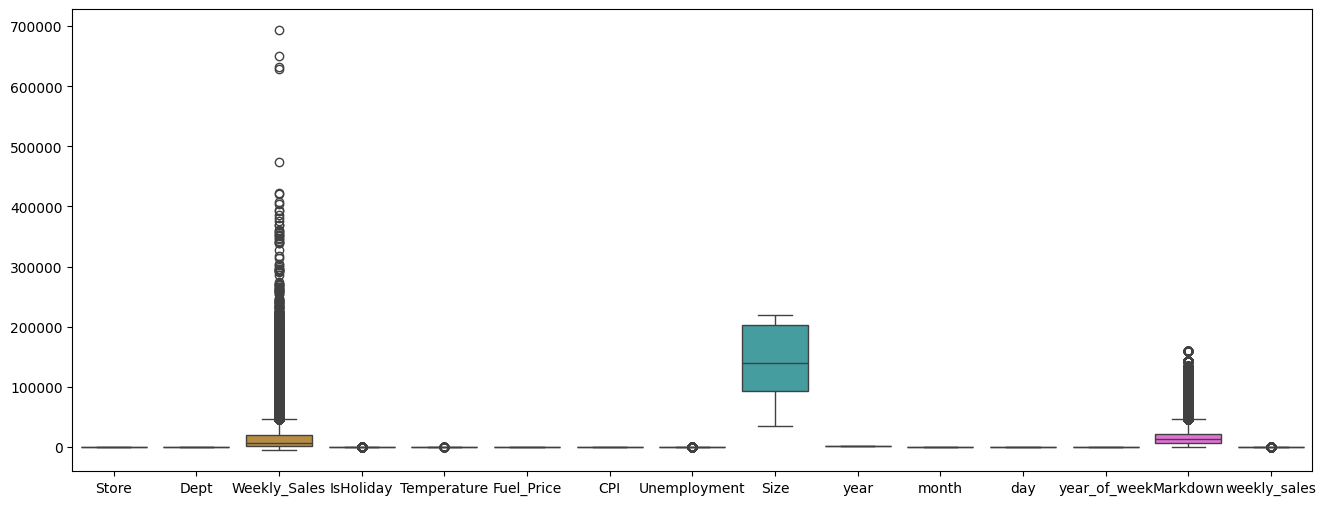

In [63]:
plt.figure(figsize=(16,6))
sns.boxplot(data=df1)
plt.show()

C:\Users\Anupama\AppData\Local\Temp\ipykernel_18212\1789832708.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['weekly_sales'],color="g")


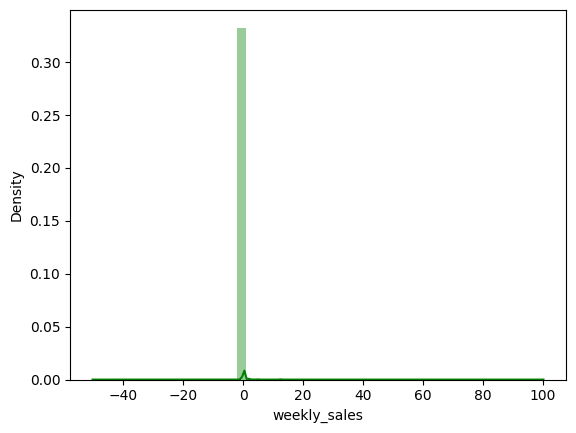

In [64]:
sns.distplot(df1['weekly_sales'],color="g")
plt.show()

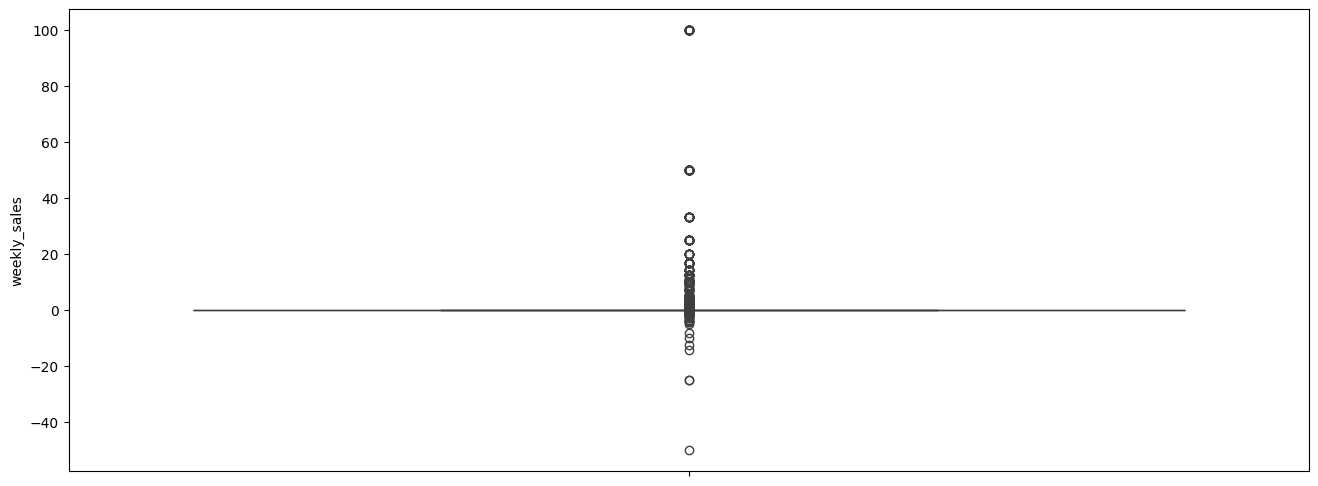

In [65]:
plt.figure(figsize=(16,6))
sns.boxplot(data=df1['weekly_sales'])
plt.show()

In [66]:
df1.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size,year,month,day,year_of_week,Markdown,weekly_sales
0,1,1,2010-02-05,24924.50,False,42.31,2.572,211.096358,8.106,A,151315,2010,2,5,5,NaN,0.000040
1,1,1,2010-02-12,46039.49,True,38.51,2.548,211.242170,8.106,A,151315,2010,2,12,6,NaN,0.000022
2,1,1,2010-02-19,41595.55,False,39.93,2.514,211.289143,8.106,A,151315,2010,2,19,7,NaN,0.000024
3,1,1,2010-02-26,19403.54,False,46.63,2.561,211.319643,8.106,A,151315,2010,2,26,8,NaN,0.000052
4,1,1,2010-03-05,21827.90,False,46.50,2.625,211.350143,8.106,A,151315,2010,3,5,9,NaN,0.000046


In [67]:
df1['IsHoliday'] = df1['IsHoliday'].astype('str')

In [68]:
##Data Preprocesing

In [69]:
from sklearn.preprocessing import OrdinalEncoder

enc=OrdinalEncoder()

for i in df1.columns:
  if df1[i].dtype == 'object'  :
      print(i)
      col_name = i
      df1[i] = enc.fit_transform(df1[[i]])
      encode = df1[i].sort_values().unique() # 0.0,1.0,2.0 - this is encoded value
      globals()[col_name] = {}
      decoded_data = enc.inverse_transform(df1[[i]])
      decoded = sorted(np.unique(decoded_data)) # original value of dataframe - like decoded value
      globals()[i] = dict(zip(decoded, encode))

Date
IsHoliday
Type


In [70]:
print(Type)
print(IsHoliday)

{'A': np.float64(0.0), 'B': np.float64(1.0), 'C': np.float64(2.0)}
{'False': np.float64(0.0), 'True': np.float64(1.0)}


In [71]:
df1.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size,year,month,day,year_of_week,Markdown,weekly_sales
0,1,1,0.0,24924.50,0.0,42.31,2.572,211.096358,8.106,0.0,151315,2010,2,5,5,NaN,0.000040
1,1,1,1.0,46039.49,1.0,38.51,2.548,211.242170,8.106,0.0,151315,2010,2,12,6,NaN,0.000022
2,1,1,2.0,41595.55,0.0,39.93,2.514,211.289143,8.106,0.0,151315,2010,2,19,7,NaN,0.000024
3,1,1,3.0,19403.54,0.0,46.63,2.561,211.319643,8.106,0.0,151315,2010,2,26,8,NaN,0.000052
4,1,1,4.0,21827.90,0.0,46.50,2.625,211.350143,8.106,0.0,151315,2010,3,5,9,NaN,0.000046


In [72]:
n_data = df1[df1['Markdown'].isnull()==True]
n_data

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size,year,month,day,year_of_week,Markdown,weekly_sales
0,1,1,0.0,24924.50,0.0,42.31,2.572,211.096358,8.106,0.0,151315,2010,2,5,5,NaN,0.000040
1,1,1,1.0,46039.49,1.0,38.51,2.548,211.242170,8.106,0.0,151315,2010,2,12,6,NaN,0.000022
2,1,1,2.0,41595.55,0.0,39.93,2.514,211.289143,8.106,0.0,151315,2010,2,19,7,NaN,0.000024
3,1,1,3.0,19403.54,0.0,46.63,2.561,211.319643,8.106,0.0,151315,2010,2,26,8,NaN,0.000052
4,1,1,4.0,21827.90,0.0,46.50,2.625,211.350143,8.106,0.0,151315,2010,3,5,9,NaN,0.000046
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421514,45,98,87.0,894.98,0.0,55.82,3.583,187.483796,8.523,1.0,118221,2011,10,7,40,NaN,0.001117
421515,45,98,88.0,996.40,0.0,63.82,3.541,187.691748,8.523,1.0,118221,2011,10,14,41,NaN,0.001004
421516,45,98,89.0,1058.84,0.0,59.60,3.570,187.784620,8.523,1.0,118221,2011,10,21,42,NaN,0.000944
421517,45,98,90.0,1167.90,0.0,51.78,3.569,187.877491,8.523,1.0,118221,2011,10,28,43,NaN,0.000856


In [73]:
not_n_data = df1[df1['Markdown'].isnull()==False]
not_n_data

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size,year,month,day,year_of_week,Markdown,weekly_sales
92,1,1,92.0,18689.54,0.0,59.11,3.297,217.998085,7.866,0.0,151315,2011,11,11,45,25671.68,0.000054
93,1,1,93.0,19050.66,0.0,62.25,3.308,218.220509,7.866,0.0,151315,2011,11,18,46,12796.45,0.000052
94,1,1,94.0,20911.25,1.0,60.14,3.236,218.467621,7.866,0.0,151315,2011,11,25,47,56876.74,0.000048
95,1,1,95.0,25293.49,0.0,48.91,3.172,218.714733,7.866,0.0,151315,2011,12,2,48,29655.58,0.000040
96,1,1,96.0,33305.92,0.0,43.93,3.158,218.961846,7.866,0.0,151315,2011,12,9,49,22865.91,0.000030
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,138.0,508.37,0.0,64.88,3.997,192.013558,8.684,1.0,118221,2012,9,28,39,9468.01,0.001967
421566,45,98,139.0,628.10,0.0,64.89,3.985,192.170412,8.667,1.0,118221,2012,10,5,40,9659.00,0.001592
421567,45,98,140.0,1061.02,0.0,54.47,4.000,192.327265,8.667,1.0,118221,2012,10,12,41,6554.03,0.000942
421568,45,98,141.0,760.01,0.0,56.47,3.969,192.330854,8.667,1.0,118221,2012,10,19,42,3982.42,0.001316


In [74]:
tab = pd.crosstab(not_n_data['IsHoliday'],not_n_data['Type'])
st.chi2_contingency(tab)

Chi2ContingencyResult(statistic=np.float64(0.11978797339926359), pvalue=np.float64(0.9418643784429717), dof=2, expected_freq=array([[71030.33473107, 54078.44903754, 14332.21623139],
       [ 6109.66526893,  4651.55096246,  1232.78376861]]))

<Axes: >

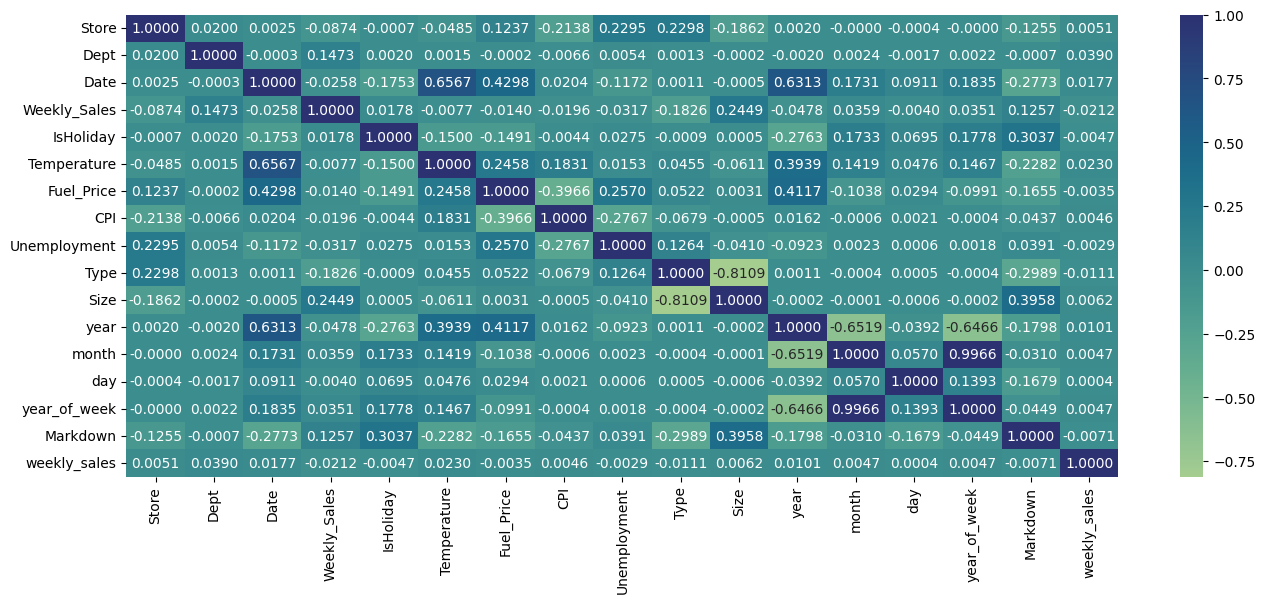

In [75]:
plt.figure(figsize=(16,6))
sns.heatmap(not_n_data.corr(),annot=True,cmap="crest",fmt=".4f")

In [76]:
##Machine learning for filling the null values in 'markdown' column

In [77]:
x = not_n_data.drop(['Markdown','Weekly_Sales','Size','Type','Date'],axis = 1)
y = not_n_data['Markdown']
print(y)

92        25671.68
93        12796.45
94        56876.74
95        29655.58
96        22865.91
            ...   
421565     9468.01
421566     9659.00
421567     6554.03
421568     3982.42
421569     5247.26
Name: Markdown, Length: 151435, dtype: float64


In [78]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=250,random_state=10,max_depth=15,min_samples_split=5)
model.fit(x,y)
y_pred = model.predict(n_data.drop(['Markdown','Weekly_Sales','Size','Type','Date'],axis = 1))

In [79]:
print(y_pred)

[23802.68700704 37452.3112     18529.19798027 ... 28818.90116542
 28795.08122373 32040.92894508]


In [80]:
y_pred1 = model.predict(x)

In [81]:
y_pred1 = model.predict(x)
from sklearn.metrics import mean_squared_error,mean_absolute_error

mean_absolute_error(y, y_pred1)

1832.6026468604334

In [82]:
print(y_pred1)

[25797.30850368 13689.74687216 56876.74       ...  7562.63404667
  4263.06090528  5254.69546528]


In [83]:
n_data['Markdown'] = y_pred

C:\Users\Anupama\AppData\Local\Temp\ipykernel_18212\3549869308.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  n_data['Markdown'] = y_pred


In [84]:
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=3)
neigh.fit(x, y)

KNeighborsRegressor(n_neighbors=3)

In [85]:
y_pred = neigh.predict(n_data.drop(['Markdown','Weekly_Sales','Size','Type','Date'],axis = 1))
y_pred

array([52955.06, 39808.76, 39808.76, ...,  3982.42, 28626.39, 21585.65],
      shape=(270135,))

In [86]:
y_pred1 = neigh.predict(x)
from sklearn.metrics import mean_squared_error,mean_absolute_error

print(mean_absolute_error(y, y_pred1))
y_pred1
     

467.9866655880965


array([30856.85      , 13994.64666667, 56876.74      , ...,
        6554.03      ,  3982.42      ,  5247.26      ], shape=(151435,))

In [87]:
n_data

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size,year,month,day,year_of_week,Markdown,weekly_sales
0,1,1,0.0,24924.50,0.0,42.31,2.572,211.096358,8.106,0.0,151315,2010,2,5,5,23802.687007,0.000040
1,1,1,1.0,46039.49,1.0,38.51,2.548,211.242170,8.106,0.0,151315,2010,2,12,6,37452.311200,0.000022
2,1,1,2.0,41595.55,0.0,39.93,2.514,211.289143,8.106,0.0,151315,2010,2,19,7,18529.197980,0.000024
3,1,1,3.0,19403.54,0.0,46.63,2.561,211.319643,8.106,0.0,151315,2010,2,26,8,30335.953952,0.000052
4,1,1,4.0,21827.90,0.0,46.50,2.625,211.350143,8.106,0.0,151315,2010,3,5,9,24046.054483,0.000046
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421514,45,98,87.0,894.98,0.0,55.82,3.583,187.483796,8.523,1.0,118221,2011,10,7,40,29528.136441,0.001117
421515,45,98,88.0,996.40,0.0,63.82,3.541,187.691748,8.523,1.0,118221,2011,10,14,41,29974.143814,0.001004
421516,45,98,89.0,1058.84,0.0,59.60,3.570,187.784620,8.523,1.0,118221,2011,10,21,42,28818.901165,0.000944
421517,45,98,90.0,1167.90,0.0,51.78,3.569,187.877491,8.523,1.0,118221,2011,10,28,43,28795.081224,0.000856


In [88]:
n_data['Markdown'].max()

np.float64(111626.17427999988)

In [89]:
# pd.set_option('display.max_rows', 100)
data = n_data.merge(not_n_data,how = 'outer')
data.shape

(421570, 17)

In [90]:
data

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size,year,month,day,year_of_week,Markdown,weekly_sales
0,1,1,0.0,24924.50,0.0,42.31,2.572,211.096358,8.106,0.0,151315,2010,2,5,5,23802.687007,0.000040
1,1,1,1.0,46039.49,1.0,38.51,2.548,211.242170,8.106,0.0,151315,2010,2,12,6,37452.311200,0.000022
2,1,1,2.0,41595.55,0.0,39.93,2.514,211.289143,8.106,0.0,151315,2010,2,19,7,18529.197980,0.000024
3,1,1,3.0,19403.54,0.0,46.63,2.561,211.319643,8.106,0.0,151315,2010,2,26,8,30335.953952,0.000052
4,1,1,4.0,21827.90,0.0,46.50,2.625,211.350143,8.106,0.0,151315,2010,3,5,9,24046.054483,0.000046
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,138.0,508.37,0.0,64.88,3.997,192.013558,8.684,1.0,118221,2012,9,28,39,9468.010000,0.001967
421566,45,98,139.0,628.10,0.0,64.89,3.985,192.170412,8.667,1.0,118221,2012,10,5,40,9659.000000,0.001592
421567,45,98,140.0,1061.02,0.0,54.47,4.000,192.327265,8.667,1.0,118221,2012,10,12,41,6554.030000,0.000942
421568,45,98,141.0,760.01,0.0,56.47,3.969,192.330854,8.667,1.0,118221,2012,10,19,42,3982.420000,0.001316


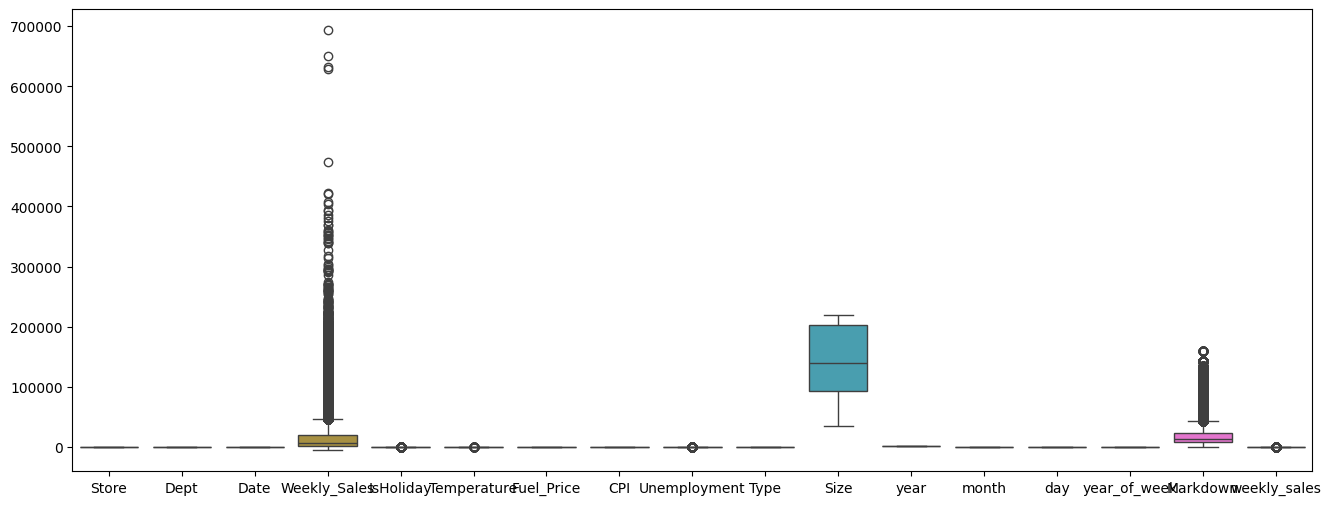

In [91]:
plt.figure(figsize=(16,6))
sns.boxplot(data=data)
plt.show()

C:\Users\Anupama\AppData\Local\Temp\ipykernel_18212\132252048.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Markdown'],color="g")


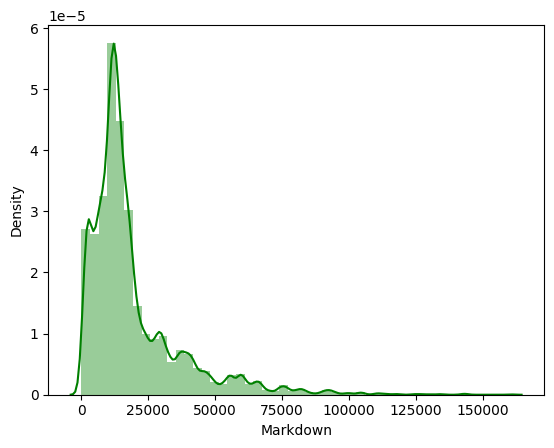

In [92]:
sns.distplot(data['Markdown'],color="g")
plt.show()

In [93]:
data.isnull().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
Type            0
Size            0
year            0
month           0
day             0
year_of_week    0
Markdown        0
weekly_sales    0
dtype: int64

In [94]:
##After filling the 'Markdown' column storing the data in to new file

In [95]:
data.to_csv('Cleaned_datas.csv',index = False)

In [96]:
df = pd.read_csv(r'/Final Project/Cleaned_datas.csv')
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size,year,month,day,year_of_week,Markdown,weekly_sales
0,1,1,0.0,24924.50,0.0,42.31,2.572,211.096358,8.106,0.0,151315,2010,2,5,5,23802.687007,0.000040
1,1,1,1.0,46039.49,1.0,38.51,2.548,211.242170,8.106,0.0,151315,2010,2,12,6,37452.311200,0.000022
2,1,1,2.0,41595.55,0.0,39.93,2.514,211.289143,8.106,0.0,151315,2010,2,19,7,18529.197980,0.000024
3,1,1,3.0,19403.54,0.0,46.63,2.561,211.319643,8.106,0.0,151315,2010,2,26,8,30335.953952,0.000052
4,1,1,4.0,21827.90,0.0,46.50,2.625,211.350143,8.106,0.0,151315,2010,3,5,9,24046.054483,0.000046


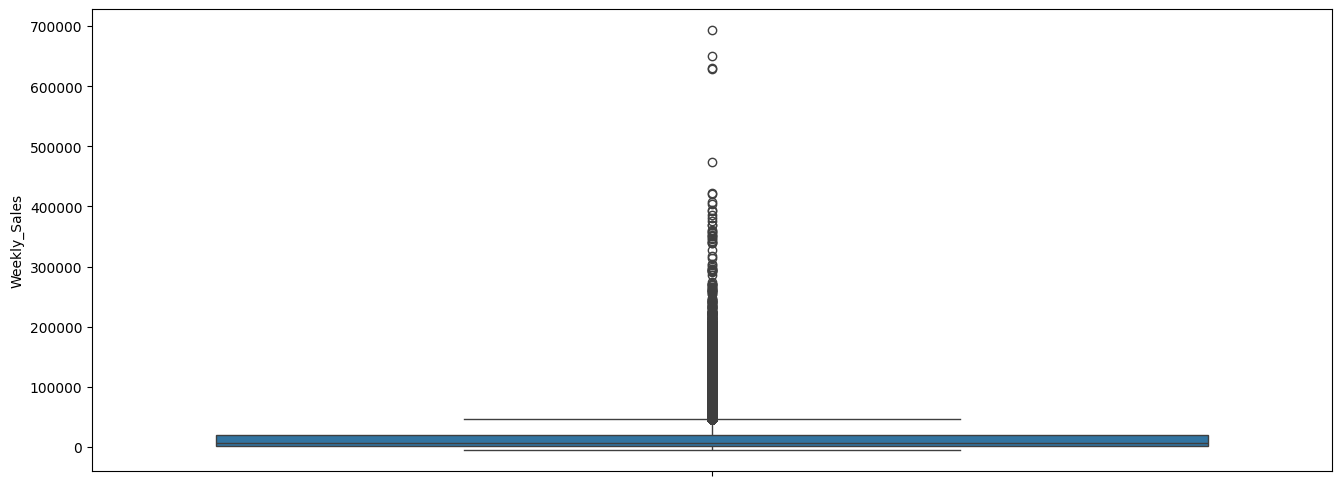

In [97]:
plt.figure(figsize=(16,6))
sns.boxplot(data=df['Weekly_Sales'])
plt.show()

In [98]:
df.drop(['Date','weekly_sales'],axis = 1, inplace = True)

In [99]:
##Seperating the continuous and categorical column for checking the corelation and hypothesis testing

In [100]:
continuous = df[['Markdown','Unemployment','CPI','Fuel_Price','Temperature','Weekly_Sales']]
continuous.head()

,Markdown,Unemployment,CPI,Fuel_Price,Temperature,Weekly_Sales
0,23802.687007,8.106,211.096358,2.572,42.31,24924.50
1,37452.311200,8.106,211.242170,2.548,38.51,46039.49
2,18529.197980,8.106,211.289143,2.514,39.93,41595.55
3,30335.953952,8.106,211.319643,2.561,46.63,19403.54
4,24046.054483,8.106,211.350143,2.625,46.50,21827.90


In [101]:
categorical = df[['Store','Size','Dept','IsHoliday','year','year_of_week','Type']]
categorical.head()

,Store,Size,Dept,IsHoliday,year,year_of_week,Type
0,1,151315,1,0.0,2010,5,0.0
1,1,151315,1,1.0,2010,6,0.0
2,1,151315,1,0.0,2010,7,0.0
3,1,151315,1,0.0,2010,8,0.0
4,1,151315,1,0.0,2010,9,0.0


<Axes: >

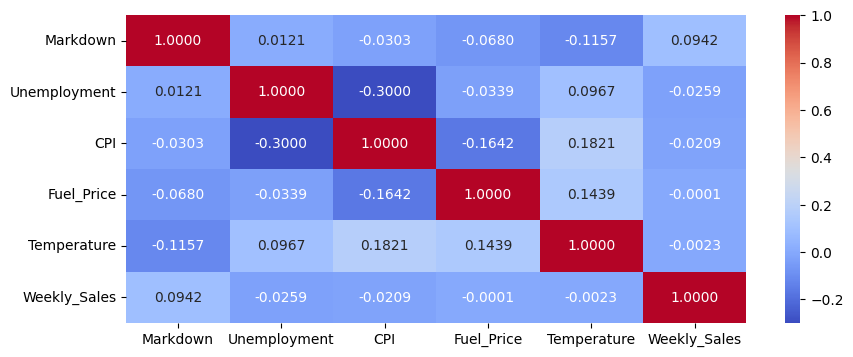

In [102]:
plt.figure(figsize=(10,4))
sns.heatmap(continuous.corr(),annot=True,cmap="coolwarm",fmt=".4f")

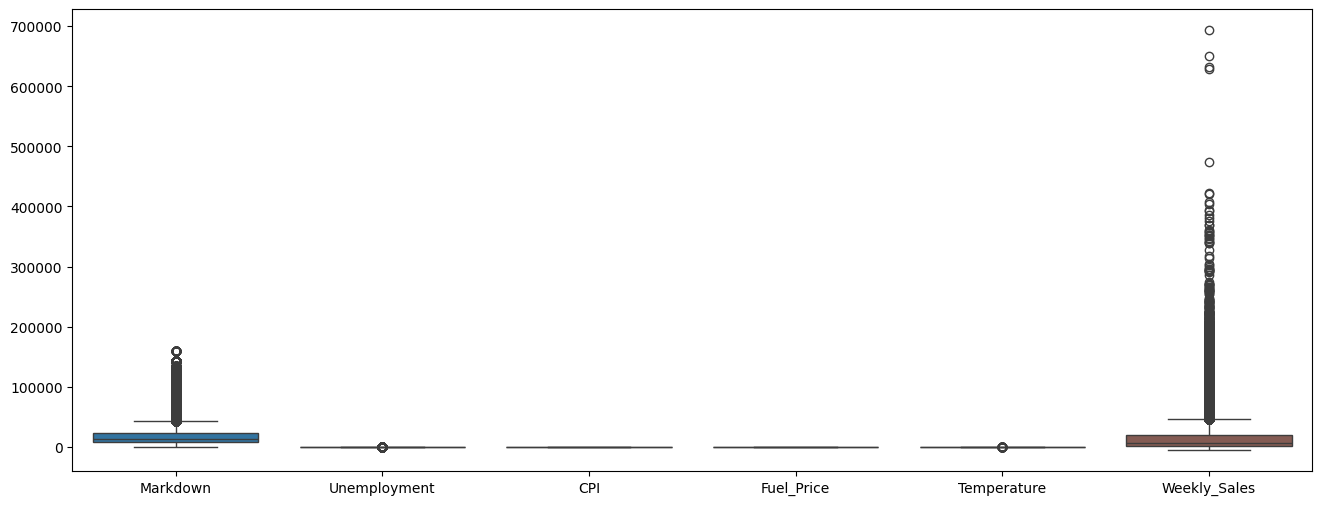

In [103]:
plt.figure(figsize=(16,6))
sns.boxplot(data=continuous)
plt.show()

In [104]:
for i in df.columns:
  print(i, df[i].skew())

Store 0.07776250174537733
Dept 0.3582231934713366
Weekly_Sales 3.262013869766834
IsHoliday 3.359866555262695
Temperature -0.3214041519699762
Fuel_Price -0.10490149562840598
CPI 0.08521928473260011
Unemployment 1.1837425684974319
Type 0.6933113912785097
Size -0.3258497664635348
year 0.05623644391430117
month 0.04078624154148521
day 0.009423172675009313
year_of_week 0.05265944161124803
Markdown 2.308243000951121


In [105]:
import warnings
import scipy.stats as stats
warnings.filterwarnings("ignore")

for i in continuous.columns:
  for j in continuous.columns:
    f_statistic, p_value = stats.f_oneway(df[i],df[j])
    if p_value > 0.05:
      print(i,j,p_value)

Markdown Markdown 1.0
Unemployment Unemployment 1.0
CPI CPI 1.0
Fuel_Price Fuel_Price 1.0
Weekly_Sales Weekly_Sales 1.0


In [106]:
import warnings
from scipy.stats import chi2_contingency
warnings.filterwarnings("ignore")

for i in categorical.columns:
  for j in categorical.columns:
    contingency_table = pd.crosstab(df[i], df[j])
    chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)
    if p_value > 0.05:
      print(i,j,p_value)

Store IsHoliday 1.0
Store year 0.9999930970270402
Store year_of_week 1.0
Size IsHoliday 1.0
Size year 0.9999373554912366
Size year_of_week 1.0
Dept year_of_week 1.0
IsHoliday Store 1.0
IsHoliday Size 1.0
IsHoliday Type 0.8019943216474763
year Store 0.9999930970270402
year Size 0.9999373554912366
year_of_week Store 1.0
year_of_week Size 1.0
year_of_week Dept 1.0
year_of_week Type 1.0
Type IsHoliday 0.8019943216474763
Type year_of_week 1.0


In [107]:
from scipy.stats import f_oneway

for i in df.columns:
  for j in df.columns:
    f_statistic, p_value = f_oneway(df[i],df[j])
    if p_value > 0.05:
      print(i,j,p_value)

Dept Dept 1.0
Weekly_Sales Weekly_Sales 1.0
IsHoliday IsHoliday 1.0
Fuel_Price Fuel_Price 1.0
CPI CPI 1.0
Unemployment Unemployment 1.0
year year 1.0
month month 1.0
year_of_week year_of_week 1.0
Markdown Markdown 1.0


In [108]:
for i in df.columns:
  print(f_oneway(df[i],df['Weekly_Sales']))

F_onewayResult(statistic=np.float64(208164.56686223287), pvalue=np.float64(0.0))
F_onewayResult(statistic=np.float64(207589.17678845974), pvalue=np.float64(0.0))
F_onewayResult(statistic=np.float64(4.039178916749599e-27), pvalue=np.float64(1.0))
F_onewayResult(statistic=np.float64(208742.34961140653), pvalue=np.float64(0.0))
F_onewayResult(statistic=np.float64(207177.23491288486), pvalue=np.float64(0.0))
F_onewayResult(statistic=np.float64(208656.3947630383), pvalue=np.float64(0.0))
F_onewayResult(statistic=np.float64(204295.12886950042), pvalue=np.float64(0.0))
F_onewayResult(statistic=np.float64(208536.28682677238), pvalue=np.float64(0.0))
F_onewayResult(statistic=np.float64(208728.77715366776), pvalue=np.float64(0.0))
F_onewayResult(statistic=np.float64(1451526.3140741216), pvalue=np.float64(0.0))
F_onewayResult(statistic=np.float64(159515.7246580436), pvalue=np.float64(0.0))
F_onewayResult(statistic=np.float64(208575.73312188868), pvalue=np.float64(0.0))
F_onewayResult(statistic=np

In [109]:
categorical1 = df[['Store','Dept','year','year_of_week']]
categorical1.head()

,Store,Dept,year,year_of_week
0,1,1,2010,5
1,1,1,2010,6
2,1,1,2010,7
3,1,1,2010,8
4,1,1,2010,9


In [110]:
for i in categorical1.columns:
  for j in categorical1.columns:
    contingency_table = pd.crosstab(df[i], df[j])
    chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)
    if p_value > 0.05:
      print(i,j,p_value)

Store year 0.9999930970270402
Store year_of_week 1.0
Dept year_of_week 1.0
year Store 0.9999930970270402
year_of_week Store 1.0
year_of_week Dept 1.0


In [111]:
df.drop(['Fuel_Price','Temperature','Size','Type'],axis = 1, inplace = True)
df.head()

,Store,Dept,Weekly_Sales,IsHoliday,CPI,Unemployment,year,month,day,year_of_week,Markdown
0,1,1,24924.50,0.0,211.096358,8.106,2010,2,5,5,23802.687007
1,1,1,46039.49,1.0,211.242170,8.106,2010,2,12,6,37452.311200
2,1,1,41595.55,0.0,211.289143,8.106,2010,2,19,7,18529.197980
3,1,1,19403.54,0.0,211.319643,8.106,2010,2,26,8,30335.953952
4,1,1,21827.90,0.0,211.350143,8.106,2010,3,5,9,24046.054483


In [112]:
data = df.copy()
data

,Store,Dept,Weekly_Sales,IsHoliday,CPI,Unemployment,year,month,day,year_of_week,Markdown
0,1,1,24924.50,0.0,211.096358,8.106,2010,2,5,5,23802.687007
1,1,1,46039.49,1.0,211.242170,8.106,2010,2,12,6,37452.311200
2,1,1,41595.55,0.0,211.289143,8.106,2010,2,19,7,18529.197980
3,1,1,19403.54,0.0,211.319643,8.106,2010,2,26,8,30335.953952
4,1,1,21827.90,0.0,211.350143,8.106,2010,3,5,9,24046.054483
...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,508.37,0.0,192.013558,8.684,2012,9,28,39,9468.010000
421566,45,98,628.10,0.0,192.170412,8.667,2012,10,5,40,9659.000000
421567,45,98,1061.02,0.0,192.327265,8.667,2012,10,12,41,6554.030000
421568,45,98,760.01,0.0,192.330854,8.667,2012,10,19,42,3982.420000


In [113]:
##Applying inverse transformation for 'Markdown' Column

In [114]:
def inv_trans(x):
  if x == 0:
    return x
  else:
    return 1/x

data['Markdown'] = data['Markdown'].apply(inv_trans)

In [115]:
data.head()

,Store,Dept,Weekly_Sales,IsHoliday,CPI,Unemployment,year,month,day,year_of_week,Markdown
0,1,1,24924.50,0.0,211.096358,8.106,2010,2,5,5,0.000042
1,1,1,46039.49,1.0,211.242170,8.106,2010,2,12,6,0.000027
2,1,1,41595.55,0.0,211.289143,8.106,2010,2,19,7,0.000054
3,1,1,19403.54,0.0,211.319643,8.106,2010,2,26,8,0.000033
4,1,1,21827.90,0.0,211.350143,8.106,2010,3,5,9,0.000042


In [116]:
##Machine learning for predicting the Weekly sales

x = data.drop(['Weekly_Sales','Unemployment','CPI','IsHoliday'],axis = 1)
y = data['Weekly_Sales']
print(x)

        Store  Dept  year  month  day  year_of_week  Markdown
0           1     1  2010      2    5             5  0.000042
1           1     1  2010      2   12             6  0.000027
2           1     1  2010      2   19             7  0.000054
3           1     1  2010      2   26             8  0.000033
4           1     1  2010      3    5             9  0.000042
...       ...   ...   ...    ...  ...           ...       ...
421565     45    98  2012      9   28            39  0.000106
421566     45    98  2012     10    5            40  0.000104
421567     45    98  2012     10   12            41  0.000153
421568     45    98  2012     10   19            42  0.000251
421569     45    98  2012     10   26            43  0.000191

[421570 rows x 7 columns]


In [117]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25, random_state = 35)

In [118]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((316177, 7), (105393, 7), (316177,), (105393,))

In [119]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(random_state=42,max_depth=50,min_samples_split=5)#,min_samples_split=10, max_depth=10)4294967295
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
y_pred1 = model.predict(x_train)

In [120]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

print(mean_absolute_error(y_pred, y_test))
print(mean_absolute_error(y_pred1, y_train))

1972.0581929073692
532.241411330095


In [121]:
model1 = RandomForestRegressor(n_estimators=300,random_state=10,max_depth=25,min_samples_split=2)
model1.fit(x_train, y_train)
y_pred= model1.predict(x_test)
y_pred1 = model1.predict(x_train)

In [122]:
print(mean_absolute_error(y_pred, y_test))
print(mean_absolute_error(y_pred1, y_train))

1610.5927147171374
634.0369850000923


In [123]:
neigh = KNeighborsRegressor(n_neighbors=5)
neigh.fit(x, y)
y_pred= neigh.predict(x_test)
y_pred1 = neigh.predict(x_train)

In [124]:
print(mean_absolute_error(y_pred, y_test))
print(mean_absolute_error(y_pred1, y_train))

7242.667596289323
7220.873755719406


In [125]:
from sklearn.tree import ExtraTreeRegressor

model = ExtraTreeRegressor(random_state=42,max_depth=100,min_samples_split=5)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
y_pred1 = model.predict(x_train)

In [126]:
print(mean_absolute_error(y_pred, y_test))
print(mean_absolute_error(y_pred1, y_train))

3056.6246802988035
1310.8450713269203


In [127]:
from sklearn.ensemble import BaggingRegressor
model1 = BaggingRegressor(n_estimators=100,random_state=10,max_samples=10)
model1.fit(x_train, y_train)
y_pred= model1.predict(x_test)
y_pred1 = model1.predict(x_train)

In [128]:
print(mean_absolute_error(y_pred, y_test))
print(mean_absolute_error(y_pred1, y_train))

14727.076830300583
14785.399296920814


In [129]:
print(mean_absolute_error(y_pred, y_test))
print(mean_absolute_error(y_pred1, y_train))

14727.076830300583
14785.399296920814


In [130]:
from sklearn.ensemble import AdaBoostRegressor

model1 = AdaBoostRegressor(n_estimators=1000,random_state=30,learning_rate=0.1)
model1.fit(x_train, y_train)
y_pred= model1.predict(x_test)
y_pred1 = model1.predict(x_train)
     


print(mean_absolute_error(y_pred, y_test))
print(mean_absolute_error(y_pred1, y_train))

24382.652641319266
24501.666718061377


In [132]:
from sklearn.ensemble import GradientBoostingRegressor

model1 = GradientBoostingRegressor(n_estimators=1000,random_state=30,learning_rate=0.1)
model1.fit(x_train, y_train)
y_pred= model1.predict(x_test)
y_pred1 = model1.predict(x_train)
     



print(mean_absolute_error(y_pred, y_test))
print(mean_absolute_error(y_pred1, y_train))

5648.489919231414
5613.240119082459


In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from math import sqrt
import mlflow
import mlflow.sklearn
import warnings
import pickle

warnings.filterwarnings("ignore")

def preprocess_data(df):
    """Preprocesses the dataframe for model training."""
    df = pd.read_csv('Cleaned_datas.csv')
    return df
     
    def inv_trans(x):
        return 1 / x if x != 0 else 0

    df['Markdown'] = df['Markdown'].apply(inv_trans)
    X = df.drop(['Weekly_Sales', 'Size', 'Type', 'Date', 'weekly_sales'], axis=1)
    y = df['Weekly_Sales']
    return X, y # return a tuple



def train_and_log_random_forest(df):
    """Trains a RandomForestRegressor model, logs metrics, and saves the model."""
    df = pd.read_csv('Cleaned_datas.csv')

#  Data preprocessing
    x = df.drop(['Size', 'Type', 'Date', 'weekly_sales'], axis=1)  # Features
    y = df['weekly_sales']  # Target variable

    X, y = preprocess_data(df.copy())
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=30)

    n_estimators_val = [50, 100, 200, 300, 350, 400]
    Max_depth = [10, 10, 10, 25, 25, 25]
    Min_sample_split = [5, 5, 5, 15, 15, 15]
    Min_samples_leaf = [7, 7, 7, 13, 13, 13]

    for i, j, k, l in zip(Max_depth, Min_sample_split, Min_samples_leaf, n_estimators_val):
        model_rf = RandomForestRegressor(criterion='squared_error', n_estimators=l, max_depth=i,
                                         min_samples_split=j, min_samples_leaf=k, random_state=30)
        model_rf.fit(X_train, y_train)

        y_train_pred = model_rf.predict(X_train)
        y_test_pred = model_rf.predict(X_test)

        train_MAE = mean_absolute_error(y_train_pred, y_train)
        test_MAE = mean_absolute_error(y_test_pred, y_test)

        train_MSE = mean_squared_error(y_train_pred, y_train)
        test_MSE = mean_squared_error(y_test_pred, y_test)

        train_RMSE = sqrt(train_MSE)
        test_RMSE = sqrt(test_MSE)

        train_MAPE = mean_absolute_percentage_error(y_train_pred, y_train)
        test_MAPE = mean_absolute_percentage_error(y_test_pred, y_test)

        with mlflow.start_run():
            mlflow.log_param('n_estimators', l)
            mlflow.log_param('max_depth', i)
            mlflow.log_param('min_sample_split', j)
            mlflow.log_param('min_samples_leaf', k)

            mlflow.log_metric('train_MeanAbsoluteError', train_MAE)
            mlflow.log_metric('test_MeanAbsoluteError', test_MAE)

            mlflow.log_metric('train_MeanSquaredError', train_MSE)
            mlflow.log_metric('test_MeanSquaredError', test_MSE)

            mlflow.log_metric('train_RootMeanSquaredError', train_RMSE)
            mlflow.log_metric('test_RootMeanSquaredError', test_RMSE)

            mlflow.log_metric('train_MeanAbsolutePercentageError', train_MAPE)
            mlflow.log_metric('test_MeanAbsolutePercentageError', test_MAPE)

            mlflow.sklearn.log_model(model_rf, 'model')

    #Pickle the model that had the best performance based on your metric of choice.
    #For simplicity, I will pickle the last model that was trained.
    with open('model.pkl', 'wb') as file:
        pickle.dump(model_rf, file)
    print("Model trained and saved as 'model.pkl'")
    return model_rf

def predict_sales(store, dept, holiday, temperature, fuel, cpi, unemployment, year, yearofweek, markdown):
    """Predicts weekly sales using the trained model."""

    def inv_trans(x):
        return 1 / x if x != 0 else 0

    def is_holiday(x):
        return 1 if x else 0

    processed_input = pd.DataFrame({
        'Store': [store],
        'Dept': [dept],
        'Temperature': [temperature],
        'Fuel_Price': [fuel],
        'CPI': [cpi],
        'Unemployment': [unemployment],
        'year': [year],
        'year_of_week': [yearofweek],
        'IsHoliday': [is_holiday(holiday)],
        'Markdown': [inv_trans(markdown)]
    })
    try:
        with open('model.pkl', 'rb') as file:
            model = pickle.load(file)
        prediction = model.predict(processed_input)
        return prediction[0]
    except FileNotFoundError:
        print("Error: 'model.pkl' not found. Please train the model first.")
        return None

def main():
    """Loads data, trains the model, and saves it."""
    try:
        df = pd.read_csv('Cleaned_datas.csv')
    except FileNotFoundError:
        print("Error: 'Cleaned_datas.csv' not found. Please ensure the file exists in the correct directory.")
        return

    train_and_log_random_forest(df)